In [ ]:
# !pip3 install keras-visualizer
!pip3 install ann_visualizer
# %tensorflow_version 1.x
# !pip3 install keras==2.3.1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# example of training a final classification model
from keras.models import Sequential
from keras.layers import Dense
# import keras
# print(keras.__version__)


  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=382f7a67aeed78a68242645a2e7100d5586ffd6d5591e3784e4fd6ec7c1adff5
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FinalDataset.csv to FinalDataset.csv


In [ ]:
# Importing the datasets

datasets = pd.read_csv('FinalDataset.csv', sep=',')
# numpyData = datasets.to_numpy()

X = datasets.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values
Y = datasets.iloc[:, 18].values
# X
# Y
# X
# datasets
# numpyData
datasets.head()

,Age,Sex,Marital State,Job,Location,Hour of the Incident,Day of the Week,Season,Month,TBSA,Inhalation Injury,Burn Degree,Burn Cause,Place of Injury,Anatomical Site,Past Medical History,AgeGroup,TBSA Groups,Final
0,94,1,3,1,2,2,4,1,2,0.35,0,2,1,1,2,1,4,2,1
1,93,1,1,1,2,1,6,4,11,0.10,0,3,1,1,2,0,4,1,1
2,93,1,1,1,2,2,3,1,1,0.08,1,2,6,1,3,1,4,1,2
3,92,1,1,1,2,3,3,3,9,0.50,0,3,2,1,5,5,4,3,1
4,92,1,1,1,1,3,6,4,12,0.10,1,3,2,1,2,4,4,1,2


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_Train)

StandardScaler()

In [ ]:
# Now apply the transformations to the data:

X_train1 = scaler.transform(X_Train)
X_train1 = X_train1.astype(np.float32)

# X_test
Y_train1 = Y_Train.copy()
i=0
for z in Y_train1:
  if z == 1:
    Y_train1[i] = 0
  else:
    Y_train1[i] = 1
  i = i+1

Y_test1 = Y_Test.copy()
i=0
for z in Y_test1:
  if z == 1:
    Y_test1[i] = 0
  else:
    Y_test1[i] = 1
  i = i+1

X_test1 = scaler.transform(X_Test)
X_test1 = X_test1.astype(np.float32)

In [ ]:
# Fitting the classifier into the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# instantiate the model (using the default parameters)
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_Train, Y_Train)

model_RandomForestClassifier = RandomForestClassifier(n_estimators = 200)
model_RandomForestClassifier.fit(X_Train,Y_Train)

model_HistGradientBoostingClassifier = HistGradientBoostingClassifier(max_bins=10, learning_rate=0.6)
model_HistGradientBoostingClassifier.fit(X_Train, Y_Train)

model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_Train, Y_Train)

model_XGBClassifier = XGBClassifier(learning_rate=0.2, max_depth=1)
model_XGBClassifier.fit(X_Train, Y_Train)

# from sklearn.model_selection import cross_validate
# import matplotlib.pyplot as plt

# cv_dict = cross_validate(model_HistGradientBoostingClassifier, X_Train, Y_Train, return_train_score=True)
# print(cv_dict)
# model_svm = svm.SVC(kernel='linear') # Linear Kernel
# model_svm.fit(X_Train, Y_Train)

# plot of train and test scores vs tree depth
# plt.plot([0,1,2,3,4], cv_dict['train_score'], '-o', label='Train')
# plt.plot([0,1,2,3,4], cv_dict['test_score'], '-o', label='Test')
# plt.legend()
# plt.show()


age = 63
sex = 2
marital_state = 1
job = 2
location = 2
hour_of_the_incident = 2
day_of_the_week = 1
season = 4
month = 11
tbsa = 0.6
inhalation_injury = 0
burn_degree = 4
burn_cause = 1
place_of_injury = 1
anatomical_site = 2
past_medical_history = 6
age_group = 1
tbsa_groups = 3
# 2

# Y_Pred = model.predict([[age, sex, marital_state, job, location, hour_group, day_of_the_week, season, month, tbsa, 
#                          inhalation_injury, degree, cause, place_of_injury, anatomical_site, pmh, age_group, tbsa_groups]])
Y_Pred_LogisticRegression = model_LogisticRegression.predict(X_Test)
Y_Pred_LogisticRegression1 = model_LogisticRegression.predict(X_Train)
# print("predict LogisticRegression: ", Y_Pred_LogisticRegression)
# print("accuracy LogisticRegression11: ", accuracy_score(Y_Train, Y_Pred_LogisticRegression1))

Y_Pred_RandomForestClassifier = model_RandomForestClassifier.predict(X_Test)
# print("predict RandomForestClassifier: ", Y_Pred_RandomForestClassifier)

Y_Pred_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict(X_Test)
# print("predict HistGradientBoostingClassifier: ", Y_Pred_HistGradientBoostingClassifier)

Y_Pred_GaussianNB = model_GaussianNB.predict(X_Test)
# print("predict GaussianNB: ", Y_Pred_GaussianNB)

Y_Pred_XGBClassifier = model_XGBClassifier.predict(X_Test)
print("predict XGBClassifier: ", Y_Pred_XGBClassifier)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("accuracy LogisticRegression: ", accuracy_score(Y_Test, Y_Pred_LogisticRegression))
print("accurac RandomForestClassifiery: ", accuracy_score(Y_Test, Y_Pred_RandomForestClassifier))
print("accuracy HistGradientBoostingClassifier: ", accuracy_score(Y_Test, Y_Pred_HistGradientBoostingClassifier))
print("accuracy GaussianNB: ", accuracy_score(Y_Test, Y_Pred_GaussianNB))
print("accuracy XGBClassifier: ", accuracy_score(Y_Test, Y_Pred_XGBClassifier))

# from sklearn.metrics import mean_absolute_error
# mae_train = []
# mae_test = []
# i=0
# for train in Y_Train:
#   predict = model_LogisticRegression.predict(X_Train[i])
#   mae_train.append(mean_absolute_error(train, predict))
#   i +=1

# mae_test.append(mean_absolute_error(Y_Test, Y_Pred_LogisticRegression))

# print(X_Train)
# folds = range(1, 10)
# plt.plot(folds, mae_train, 'o-', color='green', label='train')
# plt.plot(folds, mae_test, 'o-', color='red', label='test')
# plt.legend()
# plt.grid()
# plt.xlabel('Number of fold')
# plt.ylabel('Mean Absolute Error')
# plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


predict XGBClassifier:  [2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2
 2 2 1 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2
 1 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2]
accuracy LogisticRegression:  0.8888888888888888
accurac RandomForestClassifiery:  0.8627450980392157
accuracy HistGradientBoostingClassifier:  0.9019607843137255
accuracy GaussianNB:  0.8562091503267973
accuracy XGBClassifier:  0.8823529411764706


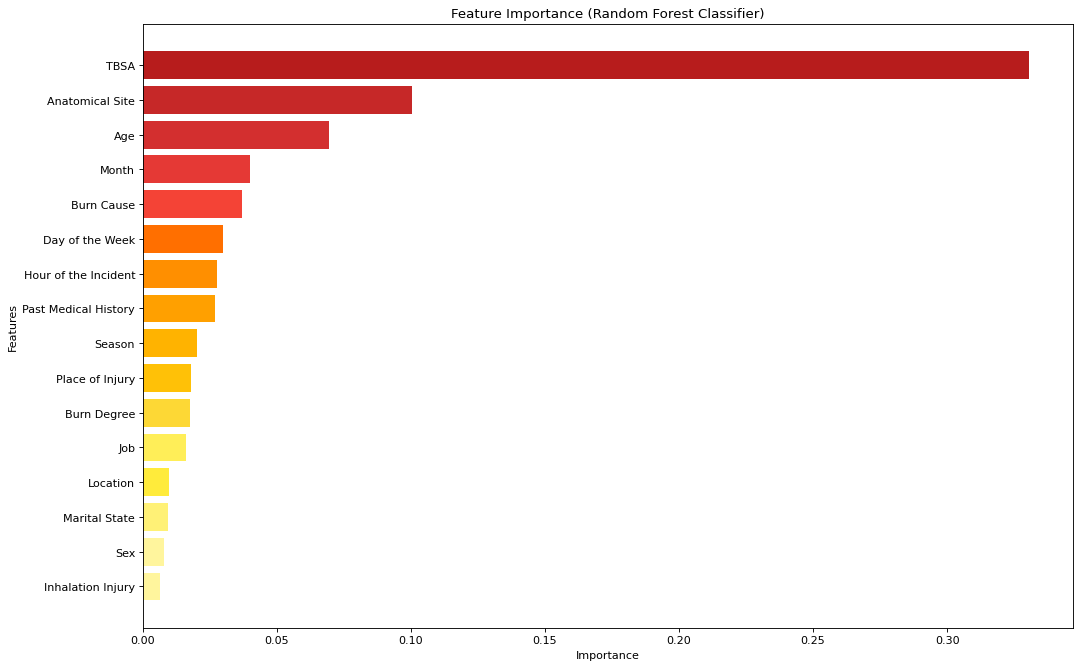

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# xg_reg = model_XGBClassifier.train( num_boost_round=10)

from sklearn.inspection import permutation_importance

a = []
i = 0
for col in datasets.columns:
    a.append(col)
    i += 1
a.pop()

figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

importances = model_RandomForestClassifier.feature_importances_
indices = np.argsort(importances)
# print(indices)
indices = np.delete(indices, 16)
indices = np.delete(indices, 8)

plt.title('Feature Importance (Random Forest Classifier)')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.barh(range(len(indices)), importances[indices],  color=['#FFF59D', '#FFF59D', '#FFF176', '#FFEB3B', '#FFEE58','#FDD835', 
                                                             '#FFC107','#FFB300', '#FFA000', '#FF8F00', '#FF6F00', '#F44336', '#E53935','#D32F2F', '#C62828', '#B71C1C'])
plt.yticks(range(len(indices)), [a[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

from google.colab import files
fig1.savefig("Feature_Importance(Random Forest Classifier).png", dpi=200)
files.download("Feature_Importance(Random Forest Classifier).png") 


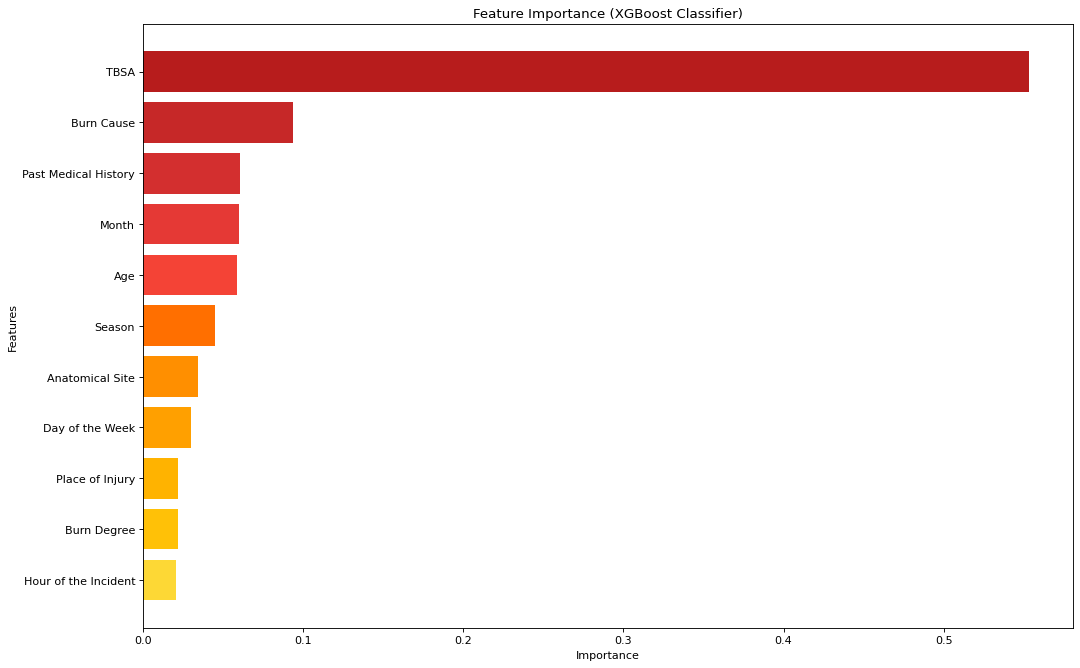

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

importances = model_XGBClassifier.feature_importances_
indices = importances.argsort()
indices = np.delete(indices, 0)
indices = np.delete(indices, 0)
indices = np.delete(indices, 0)
indices = np.delete(indices, 0)
indices = np.delete(indices, 0)
indices = np.delete(indices, 0)
indices = np.delete(indices, 0)

# fig1 = plt.gcf()
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.title('Feature Importance (XGBoost Classifier)')
plt.barh(range(len(indices)), importances[indices],  color=[ '#FDD835', '#FFC107','#FFB300', '#FFA000', '#FF8F00', '#FF6F00', '#F44336', '#E53935','#D32F2F', '#C62828', '#B71C1C'])
plt.yticks(range(len(indices)), [a[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


from google.colab import files
fig1.savefig("Feature_Importance(XGBoost Classifier).png", dpi=200)
files.download("Feature_Importance(XGBoost Classifier).png") 

In [ ]:

from keras.regularizers import l2
# from keras_visualizer import visualizer 
from ann_visualizer.visualize import ann_viz

model = Sequential()
# model.add(Dense(18, input_dim=18, activation='relu'))
model.add(Dense(18, input_dim=18, activation='relu', kernel_regularizer=l2(0.2)))
# model.add(Dense(18, activation='relu'))
# model.add(Dense(18, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() 

# visual = visualizer(model, format='png', view=True)

# from google.colab import files
# visual.savefig("nn_resolve_overfitting.png", dpi=200)
# files.download("nn_resolve_overfitting.png") 
ann_viz(model)

history = model.fit(X_train1, Y_train1, validation_data = (X_test1, Y_test1), epochs=300, verbose=2)

model.save("model.h5")
print("Saved model to disk")

# model.fit(x, y, epochs=1000, verbose=2)

# serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
15/15 - 1s - loss: 4.0525 - accuracy: 0.5120 - val_loss: 3.8502 - val_accuracy: 0.5098 - 1s/epoch - 70ms/step
Epoch 2/300
15/15 - 0s - loss: 3.6590 - accuracy: 0.6231 - val_loss: 3.4865 - val_accuracy: 0.5817 - 66ms/epoch - 4ms/step
Epoch 3/300
15/15 - 0s - loss: 3.3041 - accuracy: 0.6972 - val_loss: 3.1597 - val_accuracy: 0.6471 - 69ms/epoch - 5ms/step
Epoch 4/300
15/15 - 0s - loss: 2.9865 - accuracy: 0.7625 - val_loss: 2.8664 - val_accu

In [ ]:
# import tensorflow.python.keras
# print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

1.15.2


In [ ]:
# X_test1 = scaler.transform([[60,2,1,4,2,2,6,2,6,0.15,0,4,2,1,1,6,1,1]])
# X_test1 = scaler.transform([[61,2,1,4,1,3,0,3,7,0.8,0,4,4,1,5,1,1,4]])
# X_test1 = scaler.transform([[73,1,1,1,2,2,3,1,1,0.3,0,3,3,2,3,3,2,2]])
# X_test3 = scaler.transform([[74,2,1,3,1,2,2,4,11,0.18,1,4,3,1,2,2,2,1]])
# X_test3 = X_test3.astype(np.float32)

# X_test4 = scaler.transform(X_test)
# X_test4 = X_test4.astype(np.float32)
# pred1 = model.predict(X_test4, verbose=1)
# pred2 = model.predict(X_test4, batch_size=64, verbose=1)
# print(pred1)
# classes_x=np.argmax(pred2,axis=1)

# print(classes_x)

# X_test4 = scaler.transform(X_test)
# X_test4 = X_test4.astype(np.float32)

# print(X_test1)
# print(y_test2)
pred1 = model.predict(X_test1)
# print(pred1)

# Y_test2 = Y_test1.copy()

n = 0
for r in pred1:
  if pred1[n][0] < 0.5:
    pred1[n][0] = 0
  else:
    pred1[n][0] = 1
  n = n+1
print("accuracy neural network: ", accuracy_score(Y_test1, pred1))


accuracy neural network:  0.8823529411764706


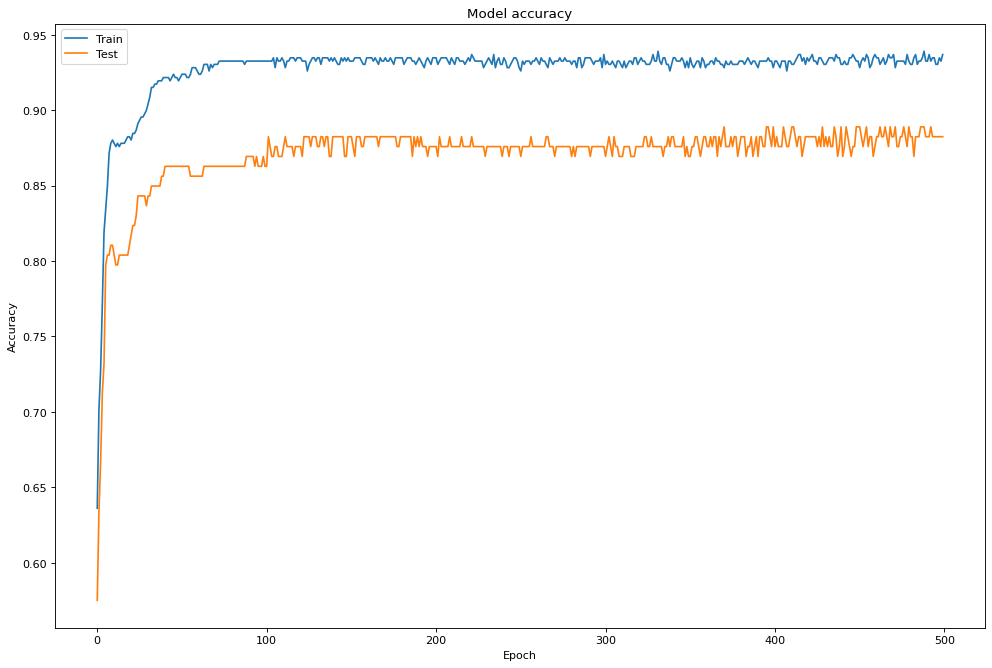

In [ ]:

figure(figsize=(15, 10), dpi=80)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

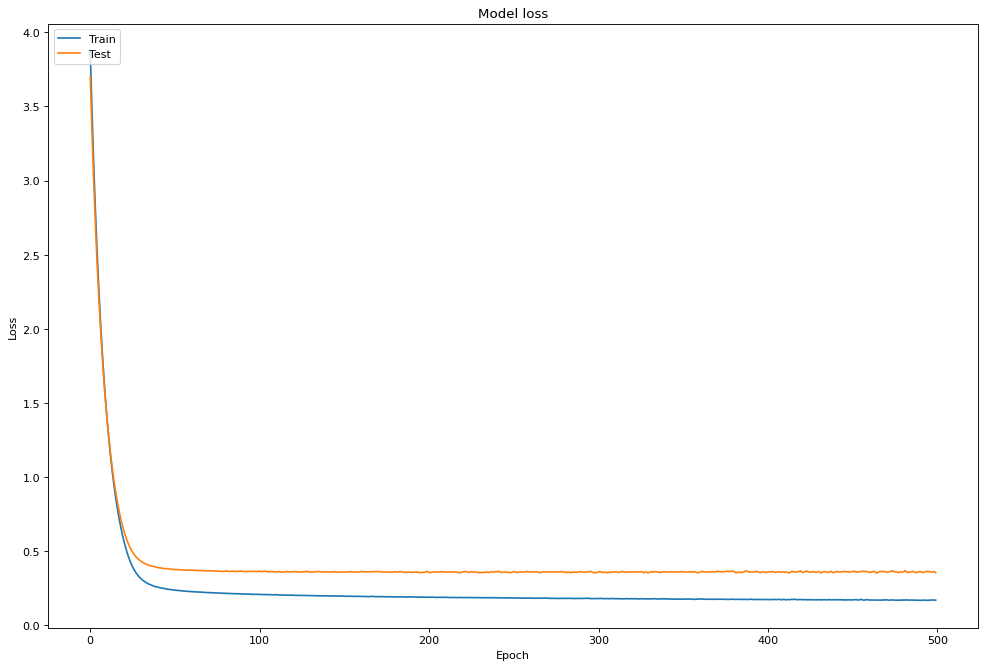

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
figure(figsize=(15, 10), dpi=80)
fig1 = plt.gcf()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
plt.draw()

from google.colab import files
fig1.savefig("nn_resolve_overfitting.png", dpi=200)
files.download("nn_resolve_overfitting.png") 

auc LogisticRegression:  0.8751983077736647
auc RandomForestClassifier:  0.8796932839767319
auc HistGradientBoostingClassifier:  0.8878900052882073
auc GaussianNB:  0.8709677419354839
auc XGBoost Classifier:  0.8648863035430989
auc Neural Network:  0.9016393442622951


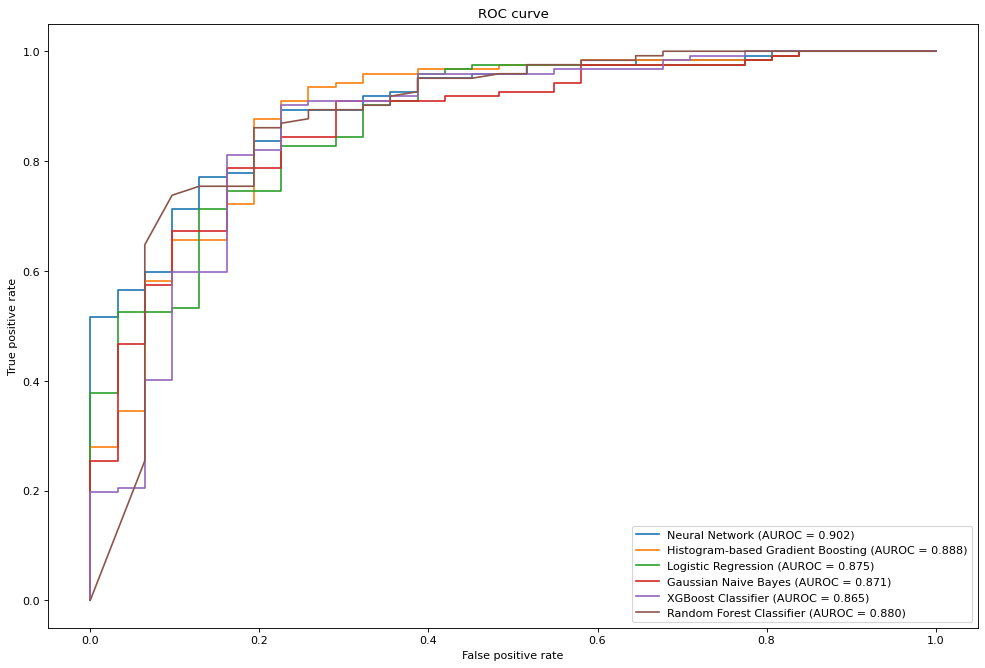

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import figure

# fpr_keras, tpr_keras, thresholds_keras = roc_curve(y1, pred1)
figure(figsize=(15, 10), dpi=80)

Y_Pred_rh_LogisticRegression = model_LogisticRegression.predict_proba(X_Test)
Y_rh_LogisticRegression = model_LogisticRegression.predict(X_Test)

Y_Pred_rh_RandomForestClassifier = model_RandomForestClassifier.predict_proba(X_Test)
Y_rh_RandomForestClassifier = model_RandomForestClassifier.predict(X_Test)

Y_Pred_rh_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict_proba(X_Test)
Y_rh_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict(X_Test)

Y_Pred_rh_GaussianNB = model_GaussianNB.predict_proba(X_Test)
Y_rh_GaussianNB = model_GaussianNB.predict(X_Test)

Y_Pred_rh_XGBClassifier = model_XGBClassifier.predict_proba(X_Test)
Y_rh_XGBClassifier = model_XGBClassifier.predict(X_Test)


pred1 = model.predict(X_test1)


Y_Pred_rh_LogisticRegression = Y_Pred_rh_LogisticRegression[:, 1]
Y_Pred_rh_RandomForestClassifier = Y_Pred_rh_RandomForestClassifier[:, 1]
Y_Pred_rh_HistGradientBoostingClassifier = Y_Pred_rh_HistGradientBoostingClassifier[:, 1]
Y_Pred_rh_GaussianNB = Y_Pred_rh_GaussianNB[:, 1]
Y_Pred_rh_XGBClassifier = Y_Pred_rh_XGBClassifier[:, 1]

# n=0
# for r in Y_Test:
#   if r == 1:
#     Y_Test[n] = 0
#   else:
#     Y_Test[n] = 1
#   n = n+1

fpr_rf_LogisticRegression, tpr_rf_LogisticRegression, thresholds_rf_LogisticRegression = roc_curve(Y_test1, Y_Pred_rh_LogisticRegression)
fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier, thresholds_rf__RandomForestClassifier = roc_curve(Y_test1, Y_Pred_rh_RandomForestClassifier)
fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier, thresholds_rf_HistGradientBoostingClassifier = roc_curve(Y_test1, Y_Pred_rh_HistGradientBoostingClassifier)
fpr_rf_GaussianNB, tpr_rf_GaussianNB, thresholds_rf_GaussianNB = roc_curve(Y_test1, Y_Pred_rh_GaussianNB)
fpr_rf_XGBClassifier, tpr_rf_XGBClassifier, thresholds_rf_XGBClassifier = roc_curve(Y_test1, Y_Pred_rh_XGBClassifier)
fpr_rf_neural_network, tpr_rf_neural_network, thresholds_rf_neural_network = roc_curve(Y_test1, pred1)


auc_rf_LogisticRegression = auc(fpr_rf_LogisticRegression, tpr_rf_LogisticRegression)
auc_rf_RandomForestClassifier = auc(fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier)
auc_rf_HistGradientBoostingClassifier = auc(fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier)
auc_rf_GaussianNB = auc(fpr_rf_GaussianNB, tpr_rf_GaussianNB)
auc_rf_XGBClassifier = auc(fpr_rf_XGBClassifier, tpr_rf_XGBClassifier)
auc_rf_neural_network = auc(fpr_rf_neural_network, tpr_rf_neural_network)

print("auc LogisticRegression: ", auc_rf_LogisticRegression)
print("auc RandomForestClassifier: ", auc_rf_RandomForestClassifier)
print("auc HistGradientBoostingClassifier: ", auc_rf_HistGradientBoostingClassifier)
print("auc GaussianNB: ", auc_rf_GaussianNB)
print("auc XGBoost Classifier: ", auc_rf_XGBClassifier)
print("auc Neural Network: ", auc_rf_neural_network)

fig1 = plt.gcf()

plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_neural_network, tpr_rf_neural_network, label='Neural Network (AUROC = {:.3f})'.format(auc_rf_neural_network))
plt.plot(fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier, label='Histogram-based Gradient Boosting (AUROC = {:.3f})'.format(auc_rf_HistGradientBoostingClassifier))
plt.plot(fpr_rf_LogisticRegression, tpr_rf_LogisticRegression, label='Logistic Regression (AUROC = {:.3f})'.format(auc_rf_LogisticRegression))
plt.plot(fpr_rf_GaussianNB, tpr_rf_GaussianNB, label='Gaussian Naive Bayes (AUROC = {:.3f})'.format(auc_rf_GaussianNB))
plt.plot(fpr_rf_XGBClassifier, tpr_rf_XGBClassifier, label='XGBoost Classifier (AUROC = {:.3f})'.format(auc_rf_XGBClassifier))
plt.plot(fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier, label='Random Forest Classifier (AUROC = {:.3f})'.format(auc_rf_RandomForestClassifier))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

from google.colab import files
fig1.savefig("ROC_Curve.png", dpi=200)
files.download("ROC_Curve.png") 

F1-score (aka F-Score / F-Measure)
Logistic Regression 0.9328063241106719
Random Forest Classifier 0.921259842519685
Histogram-based Gradient Boosting 0.9397590361445783
Gaussian Naive Bayes 0.9098360655737705
XGBoost Classifier 0.9279999999999999
Neural Network:  0.9279999999999999
Precision
Logistic Regression 0.9007633587786259
Random Forest Classifier 0.8863636363636364
Histogram-based Gradient Boosting 0.9212598425196851
Gaussian Naive Bayes 0.9098360655737705
XGBoost Classifier 0.90625
Neural Network:  0.90625
Recall (aka Sensitivity)
Logistic Regression 0.9672131147540983
Random Forest Classifier 0.9590163934426229
Histogram-based Gradient Boosting 0.9590163934426229
Gaussian Naive Bayes 0.9098360655737705
XGBoost Classifier 0.9508196721311475
Neural Network:  0.9508196721311475
Specificity
Logistic Regression 0.5806451612903226
Random Forest Classifier 0.5161290322580645
Histogram-based Gradient Boosting 0.6774193548387096
Gaussian Naive Bayes 0.6451612903225806
XGBoost Classif

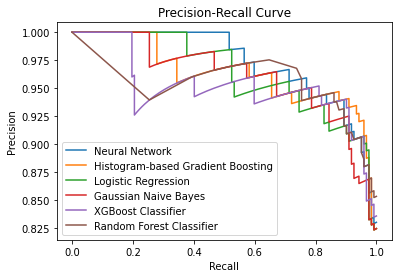

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix


pred1 = model.predict(X_test1)

Y_Pred_rh_LogisticRegression = model_LogisticRegression.predict_proba(X_Test)
Y_rh_LogisticRegression = model_LogisticRegression.predict(X_Test)
Y_Pred_rh_RandomForestClassifier = model_RandomForestClassifier.predict_proba(X_Test)
Y_rh_RandomForestClassifier = model_RandomForestClassifier.predict(X_Test)
Y_Pred_rh_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict_proba(X_Test)
Y_rh_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict(X_Test)
Y_Pred_rh_GaussianNB = model_GaussianNB.predict_proba(X_Test)
Y_rh_GaussianNB = model_GaussianNB.predict(X_Test)
Y_Pred_rh_XGBClassifier = model_XGBClassifier.predict_proba(X_Test)
Y_rh_XGBClassifier = model_XGBClassifier.predict(X_Test)

Y_Pred_rh_LogisticRegression = Y_Pred_rh_LogisticRegression[:, 1]
Y_Pred_rh_RandomForestClassifier = Y_Pred_rh_RandomForestClassifier[:, 1]
Y_Pred_rh_HistGradientBoostingClassifier = Y_Pred_rh_HistGradientBoostingClassifier[:, 1]
Y_Pred_rh_GaussianNB = Y_Pred_rh_GaussianNB[:, 1]
Y_Pred_rh_XGBClassifier = Y_Pred_rh_XGBClassifier[:, 1]

lr_precision_LogisticRegression, lr_recall_LogisticRegression, _ = precision_recall_curve(Y_test1, Y_Pred_rh_LogisticRegression)
lr_precision_RandomForestClassifier, lr_recall_RandomForestClassifier, _ = precision_recall_curve(Y_test1, Y_Pred_rh_RandomForestClassifier)
lr_precision_HistGradientBoostingClassifier, lr_recall_HistGradientBoostingClassifier, _ = precision_recall_curve(Y_test1, Y_Pred_rh_HistGradientBoostingClassifier)
lr_precision_GaussianNB, lr_recall_GaussianNB, _ = precision_recall_curve(Y_test1, Y_Pred_rh_GaussianNB)
lr_precision_XGBClassifier, lr_recall_XGBClassifier, _ = precision_recall_curve(Y_test1, Y_Pred_rh_XGBClassifier)
lr_precision_Deep, lr_recall_Deep, _ = precision_recall_curve(Y_test1, pred1)


tn_rh_LogisticRegression, fp_rh_LogisticRegression, fn_rh_LogisticRegression, tp_rh_LogisticRegression = confusion_matrix(Y_Test, Y_rh_LogisticRegression).ravel()
tn_rh_RandomForestClassifie, fp_rh_RandomForestClassifie, fn_rh_RandomForestClassifie, tp_rh_RandomForestClassifie = confusion_matrix(Y_Test, Y_rh_RandomForestClassifier).ravel()
tn_rh_HistGradientBoostingClassifier, fp_rh_HistGradientBoostingClassifier, fn_rh_HistGradientBoostingClassifier, tp_rh_HistGradientBoostingClassifier = confusion_matrix(Y_Test, Y_rh_HistGradientBoostingClassifier).ravel()
tn_rh_GaussianNB, fp_rh_GaussianNB, fn_rh_GaussianNB, tp_rh_GaussianNB = confusion_matrix(Y_Test, Y_rh_GaussianNB).ravel()
tn_rh_XGBClassifier, fp_rh_XGBClassifier, fn_rh_XGBClassifier, tp_rh_XGBClassifier = confusion_matrix(Y_Test, Y_rh_XGBClassifier).ravel()


precision_score_rh_LogisticRegression = tp_rh_LogisticRegression / (tp_rh_LogisticRegression + fp_rh_LogisticRegression)
recall_score_rh_LogisticRegression = tp_rh_LogisticRegression / (tp_rh_LogisticRegression + fn_rh_LogisticRegression)
specificity_rh_LogisticRegression = tn_rh_LogisticRegression / (tn_rh_LogisticRegression + fp_rh_LogisticRegression)
f1_rh_LogisticRegression = 2*(recall_score_rh_LogisticRegression * precision_score_rh_LogisticRegression) / (recall_score_rh_LogisticRegression + precision_score_rh_LogisticRegression)

precision_score_rh_RandomForestClassifier = tp_rh_RandomForestClassifie / (tp_rh_RandomForestClassifie + fp_rh_RandomForestClassifie)
recall_score_rh_RandomForestClassifier = tp_rh_RandomForestClassifie / (tp_rh_RandomForestClassifie + fn_rh_RandomForestClassifie)
specificity_rh_RandomForestClassifier = tn_rh_RandomForestClassifie / (tn_rh_RandomForestClassifie + fp_rh_RandomForestClassifie)
f1_rh_RandomForestClassifier = 2 * (recall_score_rh_RandomForestClassifier * precision_score_rh_RandomForestClassifier) / (recall_score_rh_RandomForestClassifier + precision_score_rh_RandomForestClassifier)

precision_score_rh_HistGradientBoostingClassifier = tp_rh_HistGradientBoostingClassifier / (tp_rh_HistGradientBoostingClassifier + fp_rh_HistGradientBoostingClassifier)
recall_score_rh_HistGradientBoostingClassifier = tp_rh_HistGradientBoostingClassifier / (tp_rh_HistGradientBoostingClassifier + fn_rh_HistGradientBoostingClassifier)
specificity_rh_HistGradientBoostingClassifier = tn_rh_HistGradientBoostingClassifier / (tn_rh_HistGradientBoostingClassifier + fp_rh_HistGradientBoostingClassifier)
f1_rh_HistGradientBoostingClassifier = 2 * (recall_score_rh_HistGradientBoostingClassifier * precision_score_rh_HistGradientBoostingClassifier) / (recall_score_rh_HistGradientBoostingClassifier + precision_score_rh_HistGradientBoostingClassifier)

precision_score_rh_GaussianNB = tp_rh_GaussianNB / (tp_rh_GaussianNB + fp_rh_GaussianNB)
recall_score_rh_GaussianNB = tp_rh_GaussianNB / (tp_rh_GaussianNB + fn_rh_GaussianNB)
specificity_rh_GaussianNB = tn_rh_GaussianNB / (tn_rh_GaussianNB + fp_rh_GaussianNB)
f1_rh_GaussianNB = 2 * (recall_score_rh_GaussianNB * precision_score_rh_GaussianNB) / (recall_score_rh_GaussianNB + precision_score_rh_GaussianNB)

precision_score_rh_XGBClassifier = tp_rh_XGBClassifier / (tp_rh_XGBClassifier + fp_rh_XGBClassifier)
recall_score_rh_XGBClassifier = tp_rh_XGBClassifier / (tp_rh_XGBClassifier + fn_rh_XGBClassifier)
specificity_rh_XGBClassifier = tn_rh_XGBClassifier / (tn_rh_XGBClassifier + fp_rh_XGBClassifier)
f1_rh_XGBClassifier = 2 * (recall_score_rh_XGBClassifier * precision_score_rh_XGBClassifier) / (recall_score_rh_XGBClassifier + precision_score_rh_XGBClassifier)


# f1_rh_LogisticRegression = f1_score(Y_Test, Y_rh_LogisticRegression)
# f1_rh_RandomForestClassifier = f1_score(Y_Test, Y_rh_RandomForestClassifier)
# f1_rh_HistGradientBoostingClassifier = f1_score(Y_Test, Y_rh_HistGradientBoostingClassifier)
# f1_rh_GaussianNB = f1_score(Y_Test, Y_rh_GaussianNB)
# f1_rh_XGBClassifier = f1_score(Y_Test, Y_rh_XGBClassifier)


# precision_score_rh_LogisticRegression = precision_score(Y_Test, Y_rh_LogisticRegression)
# precision_score_rh_RandomForestClassifier = precision_score(Y_Test, Y_rh_RandomForestClassifier)
# precision_score_rh_HistGradientBoostingClassifier = precision_score(Y_Test, Y_rh_HistGradientBoostingClassifier)
# precision_score_rh_GaussianNB = precision_score(Y_Test, Y_rh_GaussianNB)
# precision_score_rh_XGBClassifier = precision_score(Y_Test, Y_rh_XGBClassifier)

# recall_score_rh_LogisticRegression = recall_score(Y_Test, Y_rh_LogisticRegression)
# recall_score_rh_RandomForestClassifier = recall_score(Y_Test, Y_rh_RandomForestClassifier)
# recall_score_rh_HistGradientBoostingClassifier = recall_score(Y_Test, Y_rh_HistGradientBoostingClassifier)
# recall_score_rh_GaussianNB = recall_score(Y_Test, Y_rh_GaussianNB)
# recall_score_rh_XGBClassifier = recall_score(Y_Test, Y_rh_XGBClassifier)

n=0
for r in pred1:
  if pred1[n][0] < 0.5:
    pred1[n][0] = 0
  else:
    pred1[n][0] = 1
  n = n+1

tn_rh_Deep, fp_rh_Deep, fn_rh_Deep, tp_rh_Deep = confusion_matrix(Y_test1, pred1).ravel()

# f1_rh_Deep = f1_score(Y_test1, pred1)
# precision_score_rh_Deep = precision_score(Y_test1, pred1)
# recall_score_rh_Deep = recall_score(Y_test1, pred1)

precision_score_rh_Deep = tp_rh_Deep / (tp_rh_Deep + fp_rh_Deep)
recall_score_rh_Deep = tp_rh_Deep / (tp_rh_Deep + fn_rh_Deep)
specificity_rh_Deep = tn_rh_Deep / (tn_rh_Deep + fp_rh_Deep)
f1_rh_Deep = 2 * (recall_score_rh_Deep * precision_score_rh_Deep) / (recall_score_rh_Deep + precision_score_rh_Deep)



# print(precision_score_rh_LogisticRegression)
# print(recall_score_rh_LogisticRegression)
# print(specificity_rh_LogisticRegression)
# print(f1_rh_LogisticRegression)

print("F1-score (aka F-Score / F-Measure)")

print("Logistic Regression", f1_rh_LogisticRegression)
print("Random Forest Classifier", f1_rh_RandomForestClassifier)
print("Histogram-based Gradient Boosting", f1_rh_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes", f1_rh_GaussianNB)
print("XGBoost Classifier", f1_rh_XGBClassifier)
print("Neural Network: ", f1_rh_Deep)

print("Precision")

print("Logistic Regression", precision_score_rh_LogisticRegression)
print("Random Forest Classifier", precision_score_rh_RandomForestClassifier)
print("Histogram-based Gradient Boosting", precision_score_rh_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes", precision_score_rh_GaussianNB)
print("XGBoost Classifier", precision_score_rh_XGBClassifier)
print("Neural Network: ", precision_score_rh_Deep)

print("Recall (aka Sensitivity)")

print("Logistic Regression", recall_score_rh_LogisticRegression)
print("Random Forest Classifier", recall_score_rh_RandomForestClassifier)
print("Histogram-based Gradient Boosting", recall_score_rh_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes", recall_score_rh_GaussianNB)
print("XGBoost Classifier", recall_score_rh_XGBClassifier)
print("Neural Network: ", recall_score_rh_Deep)

print("Specificity")

print("Logistic Regression", specificity_rh_LogisticRegression)
print("Random Forest Classifier",  specificity_rh_RandomForestClassifier)
print("Histogram-based Gradient Boosting",  specificity_rh_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes",  specificity_rh_GaussianNB)
print("XGBoost Classifier", specificity_rh_XGBClassifier)
print("Neural Network: ", specificity_rh_Deep)


# print(classification_report(Y_Test, Y_rh_LogisticRegression))

# print(Y_Pred_rh_LogisticRegression)
# print(Y_rh_LogisticRegression)

fig1 = plt.gcf()

# plt.rcParams['figure.figsize'] = [20, 15]
plt.figure(1)

plt.plot(lr_recall_Deep, lr_precision_Deep, label='Neural Network')
plt.plot(lr_recall_HistGradientBoostingClassifier, lr_precision_HistGradientBoostingClassifier, label='Histogram-based Gradient Boosting')
plt.plot(lr_recall_LogisticRegression, lr_precision_LogisticRegression, label='Logistic Regression')
plt.plot(lr_recall_GaussianNB, lr_precision_GaussianNB, label='Gaussian Naive Bayes')
plt.plot(lr_recall_XGBClassifier, lr_precision_XGBClassifier, label='XGBoost Classifier')
plt.plot(lr_recall_RandomForestClassifier, lr_precision_RandomForestClassifier, label='Random Forest Classifier')
# plt.plot(lr_recall_Deep, lr_precision_Deep, marker='.', label='Neural Network')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

from google.colab import files
fig1.savefig("Precision-Recall.png", dpi=200)
files.download("Precision-Recall.png") 

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]

Y_rh_LogisticRegression = model_LogisticRegression.predict(X_Test)
tn, fp, fn, tp = confusion_matrix(Y_Test, Y_rh_LogisticRegression).ravel()
specificity = tn / (tn+fp)
specificityw = tp / (tp+fn)
precission = tp / (tp+fp)

print(recall_score(Y_Test, Y_rh_LogisticRegression, average=None))
specificity

[0.58064516 0.96721311]


0.5806451612903226